## Cellpose 3D Template

This template was done in part to help with this [forum question](https://forum.image.sc/t/cellpose-3d-artifacts/105504)

To run you need an environment with cellpose 3.1.0 and the development version of tnia-python for some visualizations. 

```
pip install cellpose==3.1.0
pip install clij2-fft==0.
pip install git+https://github.com/True-North-Intelligent-Algorithms/tnia-python.git 

In [1]:
from skimage.io import imread
import os
import numpy as np
from tnia.plotting.projections import show_xy_zy_max
from tnia.plotting.plt_helper import imshow_multi2d, random_label_cmap
from tnia.plotting.projections import show_xy_zy_max
from tnia.plotting.plt_helper import create_rgb, imshow_multi2d, create_linear_napari_color_map, get_color


In [10]:
### Use skimage cells data

from skimage.data import cells3d

im = cells3d()
print(f'image_3D.shape: {im.shape}')

# move channels last
im = np.moveaxis(im, 1, -1)

print(f'image_3D.shape: {im.shape}')


image_3D.shape: (60, 2, 256, 256)
image_3D.shape: (60, 256, 256, 2)


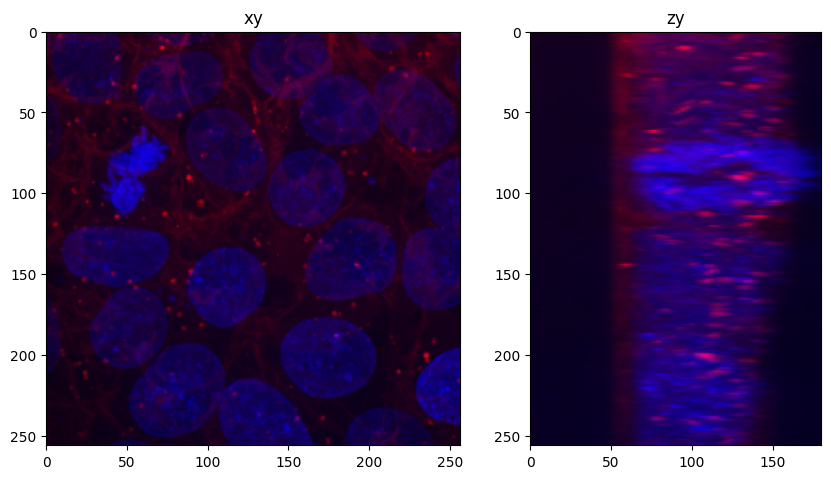

In [11]:
rgb = create_rgb(im)
fig = show_xy_zy_max(rgb,sz=3,figsize=(10,10))

In [4]:
import napari 
viewer = napari.Viewer()

for i in range(im.shape[-1]):
    color = get_color(i)
    new_colormap = create_linear_napari_color_map(str(i), color)
    viewer.add_image(im[...,i], name='im', colormap=new_colormap, blending='additive')
    #viewr.add_image(im, name='im')

In [12]:
from cellpose import models, io
import logging
#logging.basicConfig(level=logging.DEBUG)
mod = models.Cellpose(gpu=True, model_type="cyto3")

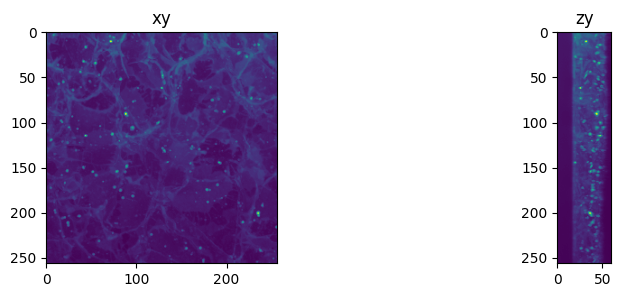

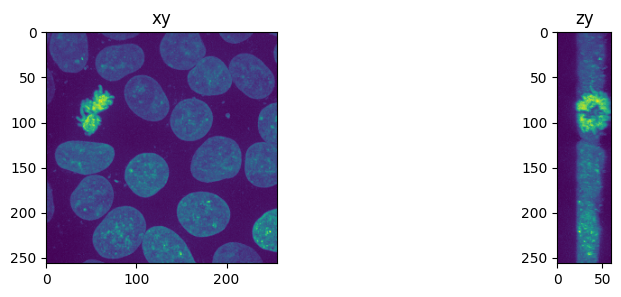

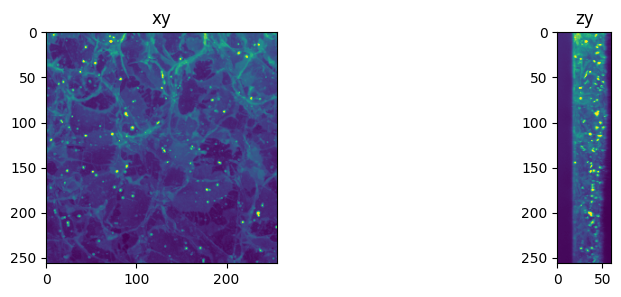

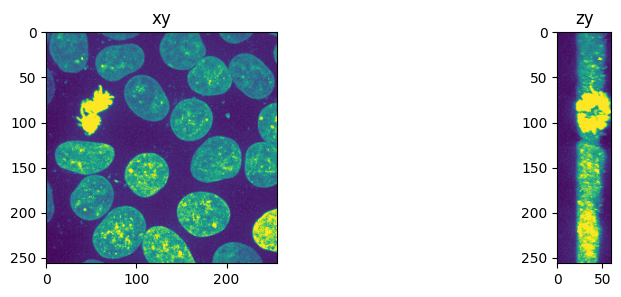

In [14]:
from tnia.deeplearning.dl_helper import quantile_normalization, get_label_paths

normalized = quantile_normalization(im, quantile_low=0.001, quantile_high=0.999)

fig = show_xy_zy_max(im[...,0])
fig = show_xy_zy_max(im[...,1])

fig = show_xy_zy_max(normalized[...,0])
fig = show_xy_zy_max(normalized[...,1])

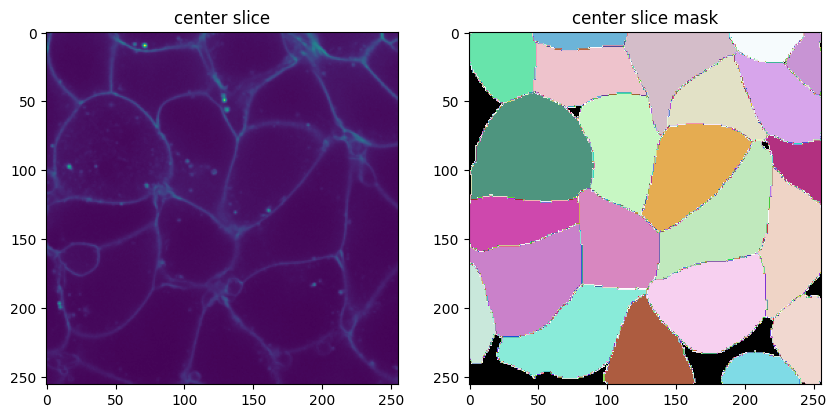

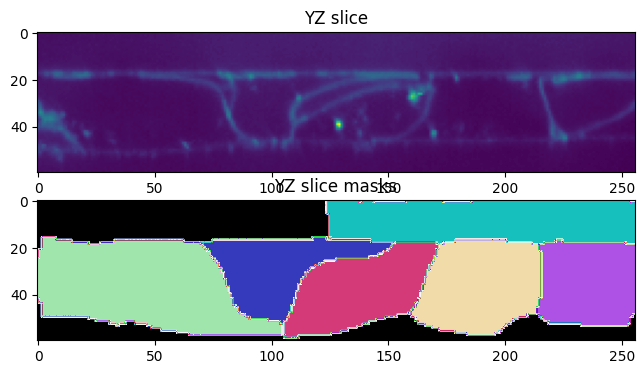

In [36]:
# get center slice 
z_slice_num = im.shape[0]//2
diameter = 60

center_slice = im[z_slice_num,:,...]
YZ_slice = im[:,im.shape[1]//2,...]

center_slice_masks = mod.eval(center_slice, diameter=diameter, channels=[0,1], cellprob_threshold=0)
YZ_slice_masks = mod.eval(YZ_slice, diameter=diameter, channels=[0,1], cellprob_threshold=0)

fig = imshow_multi2d([center_slice[...,0], center_slice_masks[0]], ['center slice', 'center slice mask'], 1, 2, height=15, colormaps=[None, random_label_cmap()])

fig = imshow_multi2d([YZ_slice[...,0], YZ_slice_masks[0]], ['YZ slice', 'YZ slice masks'], 2, 1, colormaps=[None, random_label_cmap()])  

In [38]:
viewer = napari.Viewer()

viewer.add_image(center_slice[...,1], name='center_slice')
viewer.add_labels(center_slice_masks[0], name='center_slice_masks')

<Labels layer 'center_slice_masks' at 0x2f0a27ea3b0>

In [39]:
mask3D = mod.eval(im, diameter=50, channels=[1,2], anisotropy=3,  do_3D=True, niter=200, channel_axis=3, dP_smooth=5)[0]

In [40]:
import napari

viewer = napari.Viewer()

viewer.add_image(im[...,0], name='ch0')
viewer.add_image(im[...,1], name='ch1')
#viewer.add_image(normalized, name='normalized')
viewer.add_labels(np.array(mask3D), name='mask3D')

<Labels layer 'mask3D' at 0x2f05ec926e0>